### Other Dimensionality Reduction Methods and Comparison 
__Notebook Author__: Hamed Qazanfari

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/hamedmit/Classic-ML-Algorithms/blob/main/Unsupervised_Learning/Dimensionality_Reduction/PCA_vs_tSNE_vs_UMAP.ipynb)
[![Open In kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/hamedmit/Classic-ML-Algorithms/blob/main/Unsupervised_Learning/Dimensionality_Reduction/PCA_vs_tSNE_vs_UMAP.ipynb)

---
### t-SNE and UMAP

PCA is a linear technique, meaning it may not effectively capture non-linear relationships in the data. To handle non-linear structures, we can use alternative dimensionality reduction methods like **t-SNE** and **UMAP**.

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**:
  - Preserves local relationships in high-dimensional data.
  - Effective for visualizing clusters in data.
  - Computationally expensive for large datasets.

- **UMAP (Uniform Manifold Approximation and Projection)**:
  - Preserves both local and some global structure of data.
  - Faster than t-SNE and scales better to large datasets.
  - Uses manifold learning and topological data analysis techniques.

In this section, We'll apply PCA, t-SNE, and UMAP to the MNIST dataset and compare their results:

In [ ]:
!pip install umap-learn

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Convert labels to integers
y = y.astype(int)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of samples you want in total
sample_size = 2000

# Number of unique labels/classes
num_classes = len(np.unique(y))

# Number of samples per class
samples_per_class = sample_size // num_classes

# Ensure sample_size is divisible by num_classes
sample_size = samples_per_class * num_classes

print(f"Total sample size adjusted to {sample_size} to evenly distribute among classes.")

# Initialize lists to collect indices
indices_list = []

# Set random seed for reproducibility
np.random.seed(42)

# For each class, randomly select samples_per_class indices
for class_label in np.unique(y):
    # Find indices of all samples with the current class label
    class_indices = np.where(y == class_label)[0]
    # Randomly select samples_per_class indices from the class_indices
    selected_indices = np.random.choice(class_indices, size=samples_per_class, replace=False)
    # Add the selected indices to the list
    indices_list.extend(selected_indices)

# Convert list of indices to a numpy array
indices = np.array(indices_list)

# Shuffle the indices to mix the classes
np.random.shuffle(indices)

# Get the sampled data and labels
X_sample = X_scaled[indices]
y_sample = y[indices]

print(f"Sampled data shape: {X_sample.shape}")
print(f"Sampled labels distribution: {np.bincount(y_sample)}")

Total sample size adjusted to 2000 to evenly distribute among classes.
Sampled data shape: (2000, 784)
Sampled labels distribution: [200 200 200 200 200 200 200 200 200 200]


### PCA on MNIST

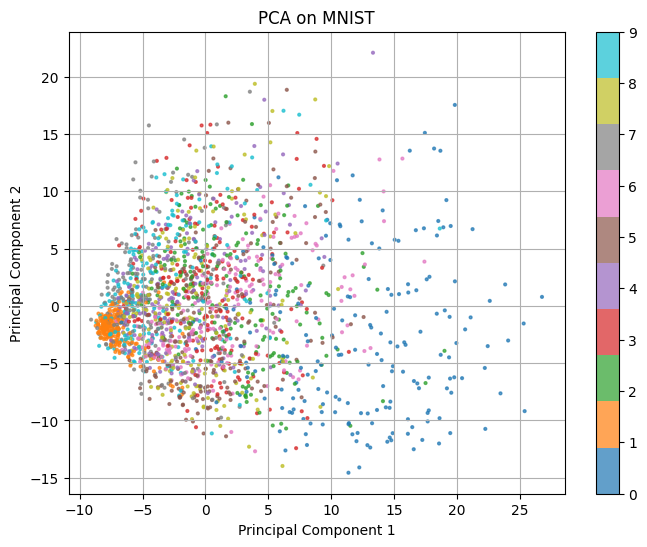

In [14]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

# Plot the PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_sample, cmap='tab10', s=4, alpha=0.7)
plt.title('PCA on MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()


### **t-SNE Algorithm (t-Distributed Stochastic Neighbor Embedding)**  
t-SNE reduces dimensionality by focusing on preserving **local similarities** between data points. It works as follows:  

1. **Compute Pairwise Similarities (High-Dimensional Space)**  
   - Measures similarity between points using a Gaussian distribution.  
   - Assigns higher probability to closer points and lower probability to distant points.  

2. **Compute Pairwise Similarities (Low-Dimensional Space)**  
   - Maps the high-dimensional points to lower dimensions.  
   - Uses a **Student’s t-distribution** instead of a Gaussian to maintain better separation.  

3. **Minimize the Difference (KL Divergence)**  
   - Compares the probability distributions in both spaces.  
   - Uses **gradient descent** to iteratively adjust points in the low-dimensional space to match the high-dimensional relationships.  

⚠️ **Drawbacks:**  
- Computationally expensive (quadratic complexity).  
- Difficult to interpret beyond visualization.  

---
### t-SNE on MNIST

c:\Users\DelbarJan-Hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


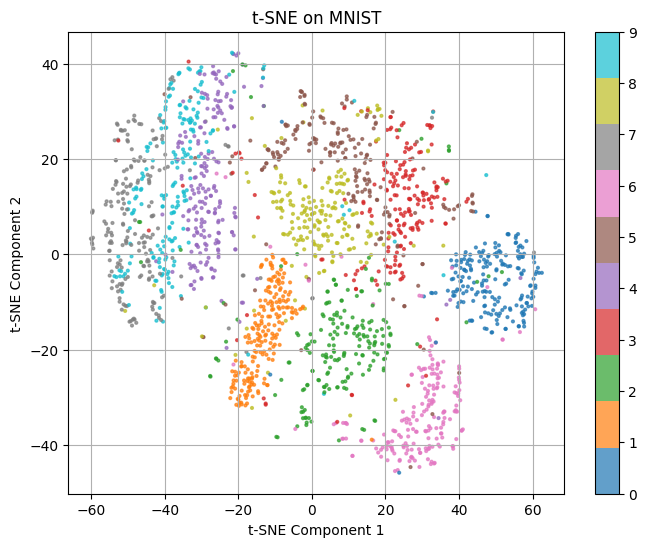

In [13]:
# Apply t-SNE to reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_sample)

# Plot the t-SNE result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='tab10', s=4, alpha=0.7)
plt.title('t-SNE on MNIST')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()

### **UMAP Algorithm (Uniform Manifold Approximation and Projection)**  
UMAP is based on **manifold learning** and **topological data analysis**. It aims to capture both **local and global** structures more effectively than t-SNE.  

1. **Graph Construction (High-Dimensional Space)**  
   - Creates a **weighted k-nearest neighbors (k-NN) graph**.  
   - Assigns probabilities based on distance and density of points.  

2. **Graph Optimization (Low-Dimensional Space)**  
   - Tries to **preserve the structure of the high-dimensional graph** in lower dimensions.  
   - Uses an approximation technique to speed up computations.  

3. **Embedding Learning**  
   - Moves points in the lower-dimensional space using an objective function similar to **force-directed graph layouts**.  
   - Ensures that close points stay close and distant points remain apart.  

⚠️ **Advantages Over t-SNE:**  
- Faster and scales better to large datasets.  
- Preserves some global structure, not just local clusters.  
- Works well for both visualization and feature extraction.
---

### UMAP on MNIST

c:\Users\DelbarJan-Hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\DelbarJan-Hamed\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


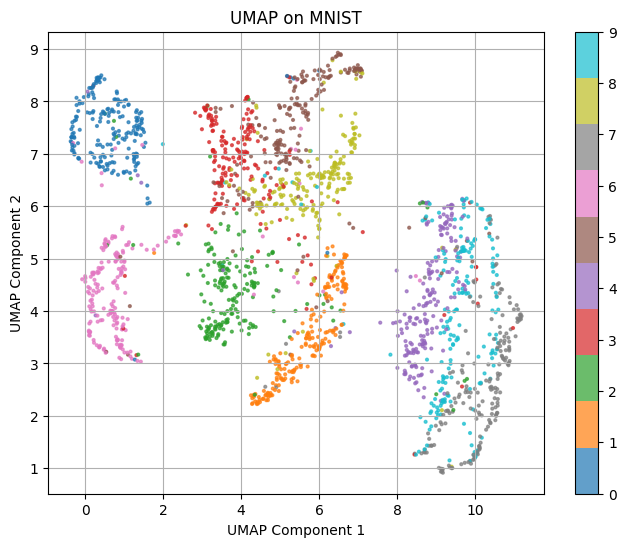

In [12]:
# Apply UMAP to reduce to 2 dimensions
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_sample)

# Plot the UMAP result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sample, cmap='tab10', s=4, alpha=0.7)
plt.title('UMAP on MNIST')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()

### Comparison and Discussion

- **PCA**:
  - Linear method capturing maximum variance directions.
  - Clusters may overlap due to its linear nature.

- **t-SNE**:
  - Non-linear method preserving local structure.
  - Often produces well-separated clusters, useful for visualization.
  - Computationally expensive on large datasets.

- **UMAP**:
  - Non-linear method preserving both local and some global structure.
  - Faster and more scalable than t-SNE.
  - Can capture complex structures in the data.

By visualizing the results, we can observe how each method reduces dimensionality and separates digit classes in the MNIST dataset.